<a href="https://colab.research.google.com/github/Aminuverse/CAPSTONE/blob/main/Aminu_Rahman_Omokayode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import PyPDF2

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
  with open(pdf_path, 'rb') as pdf_file:
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    text = ""
    for page_num in range(len(pdf_reader.pages)):
      page = pdf_reader.pages[page_num]
      text += page.extract_text()
    return text

# Path to your PDF file
pdf_path = '/content/drive/MyDrive/DATA_DICTIONARY.pdf'

# Extract text from the PDF
pdf_text = extract_text_from_pdf(pdf_path)

# Assuming your PDF data can be converted to a dataframe
# (might need adjustments depending on the PDF's structure)
# Split the text into lines
lines = pdf_text.strip().split('\n')

# Updated Logic: Assuming the first line is the header and data is separated by spaces or tabs
# Adjust ' ' or '\t' if your data is delimited differently
header = lines[0].split(' ')  # Or '\t' for tab separation
data = [line.split(' ') for line in lines[1:]] # Or '\t' for tab separation

# Ensure header and data have same column counts
# Check if the first data row matches header
if len(header) != len(data[0]):
    # If mismatch, assume single column and add dummy header
    header = ['Column1', 'Column2'] # Adjust if you have more columns in data

# Create the DataFrame
data_dict = pd.DataFrame(data, columns=header)  # Assuming first line is header

print(data_dict)

       Chicago
0        House
1        price
2         data
3    Overview:
4      dataset
..         ...
65          if
66        good
67           ,
68           0
69  otherwise)

[70 rows x 1 columns]


In [ ]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [ ]:
df.isnull().sum()


,0
Price,1
Bedroom,1
Space,11
Room,1
Lot,11
Tax,10
Bathroom,1
Garage,1
Condition,1


In [ ]:
df.describe()


,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,156.000000,156.000000,146.000000,156.000000,146.000000,147.000000,156.000000,156.000000,156.000000
mean,56.474359,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154,0.230769
std,12.875307,1.348037,462.540698,1.675247,8.457859,443.263430,0.529408,0.808454,0.422682
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,805.250000,5.000000,25.000000,652.500000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,965.500000,6.000000,30.000000,821.000000,1.500000,1.000000,0.000000
75%,65.000000,4.000000,1220.500000,7.000000,37.000000,1012.500000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


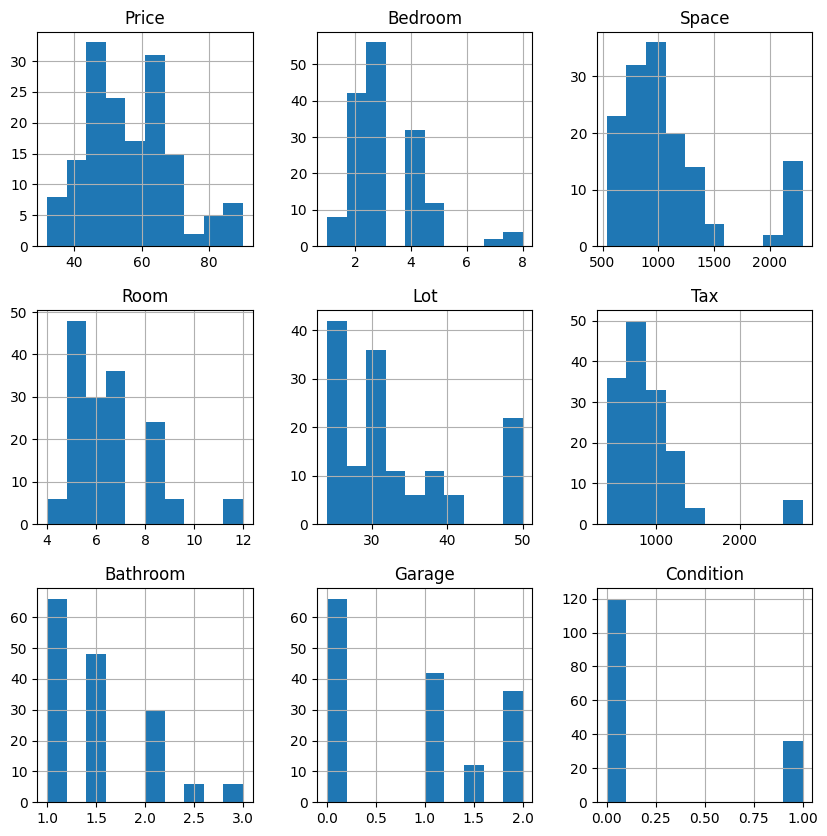

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 10))
plt.show()


<Axes: >

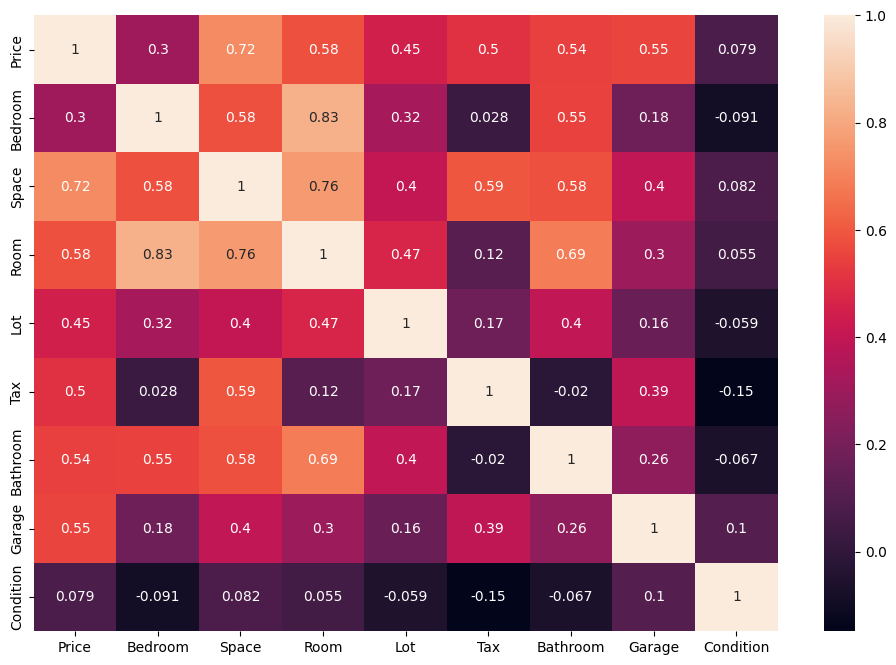

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)


In [ ]:
# Check the actual column names in your DataFrame
print(df.columns)

# Assuming there's a typo or the column name is slightly different,
# correct the column name in the drop function.
# For example, if the column name is 'Price' instead of 'Median_House_Value',
# use the following code:
X = df.drop(['Price'], axis=1)  # Replace 'Price' with the actual column name
y = df['Price']  # Replace 'Price' with the actual column name

# If the column is simply not present, revisit your data loading
# and preprocessing steps to ensure it's included in the DataFrame.

Index(['Price', 'Bedroom', 'Space', 'Room', 'Lot', 'Tax', 'Bathroom', 'Garage',
       'Condition'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
# Remove rows with NaN values in 'y_train' and corresponding rows in 'X_train'
train_data = pd.concat([X_train, y_train], axis=1)  # Combine X_train and y_train
train_data.dropna(subset=['Price'], inplace=True)  # Remove rows with NaN in 'Price' column
X_train = train_data.drop(['Price'], axis=1)  # Separate X_train again
y_train = train_data['Price']  # Separate y_train again

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [ ]:
ort RandomForestRegressor # Make sure RandomForestRegressor is imported


# Decision Tree metrics
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

# Predict using the RandomForestRegressor before calculating metrics
y_pred_rf = rf.predict(X_test)  # This line is added to make the prediction

# Random Forest metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Decision Tree RMSE: {rmse_dt}, R²: {r2_dt}")
print(f"Random Forest RMSE: {rmse_rf}, R²: {r2_rf}")

Decision Tree RMSE: 5.11737237261468, R²: 0.7671393464687953
Random Forest RMSE: 3.566687560783815, R²: 0.8868818728887885
